In [1]:
#MONOCLE MagnificatiON bias estimatOr Complex seLEction

from magnification_module_revised import *
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 20})

In [2]:
#Define the edges of the redshift bins
redshift_range = np.array([0.2, 0.5, 0.75])

#---------------------------------------------
# ANALYSIS OF SIMULATIONS
#---------------------------------------------
#Define the resolution of the healpix pixels
nside = 64

#Define the resolution of the tiles in which the pixels will be grouped
nside_tes = 4

#Define file names of the simulations
filename_nomag  = 'MICE2_BOSS_magnification.fits'
filename_mag    =  'MICE2_BOSS_magnification_with_mag.fits'

#Tag for all plots
tag = 'LOW_CMASS'

#Can set the simulations to be treated as magnitude limited or not
mag_limited    = False
mag_limit_band = None
mag_limit      = None

In [3]:
#Finds alpha values for each tile by fitting the galaxy count difference with respect to the simulated convergence

#Read unmagnified file | Dilution = False always, since we only want coords before magnification
ra, dec, kappa, z = read_MICE2_fits(filename_nomag, 
                                    dilution = False, 
                                    mag_limited = mag_limited, mag_limit_band = mag_limit_band, mag_limit = mag_limit) 

#Read magnified file
dilution = True
ramag, decmag, kappamag, zmag = read_MICE2_fits(filename_mag, dilution, mag_limited, mag_limit_band, mag_limit) 


#Get relative difference of counts and mean convergence for each pixel over all tiles and reshift bins
tessellation = True 
reldiff_list, kappa_list, unc_list = compare_mag(ra, dec, kappa, z,
                                                 ramag, decmag, kappamag, zmag,
                                                 nside, redshift_range,
                                                 dilution, tessellation, nside_tes,
                                                 mag_limited, mag_limit_band, mag_limit)


#Find alphas
a_list, a_unc_list, gof_list, npix_list, tiles, alpha_est_list, alpha_est_unc_list = fit_kappa_vs_diff_tiled(reldiff_list, kappa_list, unc_list,
                                                                                                             nside, nside_tes,
                                                                                                             redshift_range,
                                                                                                             least_squares = True,
                                                                                                             dilution = True,
                                                                                                             mag_limited = mag_limited, mag_limit_band = mag_limit_band, mag_limit = mag_limit,
                                                                                                             plots = True, tag = tag)

# Outputs show the current redshift bin and tile that is being analysed together with the number of galaxies, 
# number of pixels and the coordinates of the anomalies that are being excluded.

For 0.2 < z < 0.228, in tile 0 with 256 galaxies in 96 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 0: [81]
Excluded 0 pixels with counts going from 1 to 0 in tile 0: []
For 0.2 < z < 0.228, in tile 1 with 248 galaxies in 96 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 1: [45,70]
Excluded 0 pixels with counts going from 1 to 0 in tile 1: []
For 0.2 < z < 0.228, in tile 2 with 312 galaxies in 109 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 2: [8]
Excluded 1 pixels with counts going from 1 to 0 in tile 2: [54]
For 0.2 < z < 0.228, in tile 3 with 163 galaxies in 69 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 3: []
Excluded 0 pixels with counts going from 1 to 0 in tile 3: []
For 0.2 < z < 0.228, in tile 4 with 269 galaxies in 93 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 4: []
Excluded 0 pixels with counts going from 1 to 0 in tile 4: []
For 0.2 < z < 0.228, in tile 5 with 767 galaxies in 205 pix

For 0.228 < z < 0.255, in tile 22 with 818 galaxies in 224 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 22: []
Excluded 2 pixels with counts going from 1 to 0 in tile 22: [48,66]
For 0.228 < z < 0.255, in tile 23 with 664 galaxies in 201 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 23: []
Excluded 2 pixels with counts going from 1 to 0 in tile 23: [ 99,137]
For 0.228 < z < 0.255, in tile 24 with 588 galaxies in 191 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 24: [85,98]
Excluded 2 pixels with counts going from 1 to 0 in tile 24: [ 87,104]
For 0.228 < z < 0.255, in tile 25 with 804 galaxies in 214 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 25: [47]
Excluded 0 pixels with counts going from 1 to 0 in tile 25: []
For 0.228 < z < 0.255, in tile 26 with 877 galaxies in 212 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 26: [138]
Excluded 0 pixels with counts going from 1 to 0 in tile 26: []
For 0.228 <

For 0.283 < z < 0.31, in tile 14 with 800 galaxies in 215 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 14: []
Excluded 2 pixels with counts going from 1 to 0 in tile 14: [109,149]
For 0.283 < z < 0.31, in tile 15 with 794 galaxies in 217 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 15: []
Excluded 1 pixels with counts going from 1 to 0 in tile 15: [184]
For 0.283 < z < 0.31, in tile 16 with 763 galaxies in 219 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 16: [210]
Excluded 1 pixels with counts going from 1 to 0 in tile 16: [105]
For 0.283 < z < 0.31, in tile 17 with 400 galaxies in 116 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 17: [0]
Excluded 0 pixels with counts going from 1 to 0 in tile 17: []
For 0.283 < z < 0.31, in tile 18 with 639 galaxies in 209 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 18: [80]
Excluded 1 pixels with counts going from 1 to 0 in tile 18: [90]
For 0.283 < z < 0.31, in

For 0.338 < z < 0.365, in tile 0 with 425 galaxies in 117 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 0: [40]
Excluded 0 pixels with counts going from 1 to 0 in tile 0: []
For 0.338 < z < 0.365, in tile 1 with 464 galaxies in 119 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 1: []
Excluded 0 pixels with counts going from 1 to 0 in tile 1: []
For 0.338 < z < 0.365, in tile 2 with 377 galaxies in 110 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 2: [100]
Excluded 1 pixels with counts going from 1 to 0 in tile 2: [18]
For 0.338 < z < 0.365, in tile 3 with 408 galaxies in 106 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 3: [79,97]
Excluded 0 pixels with counts going from 1 to 0 in tile 3: []
For 0.338 < z < 0.365, in tile 4 with 483 galaxies in 122 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 4: []
Excluded 1 pixels with counts going from 1 to 0 in tile 4: [50]
For 0.338 < z < 0.365, in tile 5 with 833

For 0.365 < z < 0.393, in tile 16 with 1056 galaxies in 230 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 16: [17]
Excluded 0 pixels with counts going from 1 to 0 in tile 16: []
For 0.365 < z < 0.393, in tile 17 with 620 galaxies in 130 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 17: []
Excluded 0 pixels with counts going from 1 to 0 in tile 17: []
For 0.365 < z < 0.393, in tile 18 with 1356 galaxies in 240 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 18: []
Excluded 2 pixels with counts going from 1 to 0 in tile 18: [222,223]
For 0.365 < z < 0.393, in tile 19 with 1237 galaxies in 247 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 19: [234]
Excluded 3 pixels with counts going from 1 to 0 in tile 19: [ 93,177,193]
For 0.365 < z < 0.393, in tile 20 with 1096 galaxies in 241 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 20: [103]
Excluded 0 pixels with counts going from 1 to 0 in tile 20: []
For 0.365 

For 0.42 < z < 0.448, in tile 7 with 1561 galaxies in 250 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 7: [39]
Excluded 0 pixels with counts going from 1 to 0 in tile 7: []
For 0.42 < z < 0.448, in tile 8 with 968 galaxies in 132 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 8: []
Excluded 0 pixels with counts going from 1 to 0 in tile 8: []
For 0.42 < z < 0.448, in tile 9 with 1500 galaxies in 244 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 9: [32]
Excluded 0 pixels with counts going from 1 to 0 in tile 9: []
For 0.42 < z < 0.448, in tile 10 with 1243 galaxies in 236 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 10: [176]
Excluded 2 pixels with counts going from 1 to 0 in tile 10: [ 82,156]
For 0.42 < z < 0.448, in tile 11 with 1752 galaxies in 249 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 11: []
Excluded 0 pixels with counts going from 1 to 0 in tile 11: []
For 0.42 < z < 0.448, in tile 12 wit

For 0.448 < z < 0.475, in tile 23 with 2356 galaxies in 252 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 23: []
Excluded 0 pixels with counts going from 1 to 0 in tile 23: []
For 0.448 < z < 0.475, in tile 24 with 2027 galaxies in 250 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 24: [207]
Excluded 2 pixels with counts going from 1 to 0 in tile 24: [ 42,230]
For 0.448 < z < 0.475, in tile 25 with 2074 galaxies in 253 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 25: []
Excluded 0 pixels with counts going from 1 to 0 in tile 25: []
For 0.448 < z < 0.475, in tile 26 with 2344 galaxies in 253 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 26: []
Excluded 0 pixels with counts going from 1 to 0 in tile 26: []
For 0.448 < z < 0.475, in tile 27 with 2457 galaxies in 253 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 27: []
Excluded 1 pixels with counts going from 1 to 0 in tile 27: [234]
For 0.475 < z < 0.503,

For 0.503 < z < 0.53, in tile 11 with 3079 galaxies in 256 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 11: []
Excluded 1 pixels with counts going from 1 to 0 in tile 11: [36]
For 0.503 < z < 0.53, in tile 12 with 2705 galaxies in 251 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 12: []
Excluded 0 pixels with counts going from 1 to 0 in tile 12: []
For 0.503 < z < 0.53, in tile 13 with 1064 galaxies in 129 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 13: []
Excluded 0 pixels with counts going from 1 to 0 in tile 13: []
For 0.503 < z < 0.53, in tile 14 with 2690 galaxies in 253 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 14: []
Excluded 0 pixels with counts going from 1 to 0 in tile 14: []
For 0.503 < z < 0.53, in tile 15 with 2741 galaxies in 250 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 15: [193]
Excluded 1 pixels with counts going from 1 to 0 in tile 15: [219]
For 0.503 < z < 0.53, in tile 16

For 0.53 < z < 0.558, in tile 26 with 2606 galaxies in 248 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 26: [7]
Excluded 0 pixels with counts going from 1 to 0 in tile 26: []
For 0.53 < z < 0.558, in tile 27 with 2342 galaxies in 253 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 27: []
Excluded 0 pixels with counts going from 1 to 0 in tile 27: []
For 0.558 < z < 0.585, in tile 0 with 1107 galaxies in 133 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 0: []
Excluded 1 pixels with counts going from 1 to 0 in tile 0: [84]
For 0.558 < z < 0.585, in tile 1 with 1250 galaxies in 129 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 1: [75]
Excluded 0 pixels with counts going from 1 to 0 in tile 1: []
For 0.558 < z < 0.585, in tile 2 with 897 galaxies in 122 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 2: [8]
Excluded 0 pixels with counts going from 1 to 0 in tile 2: []
For 0.558 < z < 0.585, in tile 3 with 764

For 0.585 < z < 0.612, in tile 16 with 1651 galaxies in 246 pixels
Excluded 5 pixels with counts going from 0 to 1 in tile 16: [ 14, 99,111,147,195]
Excluded 1 pixels with counts going from 1 to 0 in tile 16: [161]
For 0.585 < z < 0.612, in tile 17 with 845 galaxies in 126 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 17: []
Excluded 2 pixels with counts going from 1 to 0 in tile 17: [ 0,90]
For 0.585 < z < 0.612, in tile 18 with 1890 galaxies in 249 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 18: [67,78]
Excluded 0 pixels with counts going from 1 to 0 in tile 18: []
For 0.585 < z < 0.612, in tile 19 with 1577 galaxies in 234 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 19: [ 84,116]
Excluded 0 pixels with counts going from 1 to 0 in tile 19: []
For 0.585 < z < 0.612, in tile 20 with 2123 galaxies in 250 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 20: []
Excluded 0 pixels with counts going from 1 to 0 in tile 20: 

For 0.64 < z < 0.668, in tile 10 with 1018 galaxies in 229 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 10: []
Excluded 3 pixels with counts going from 1 to 0 in tile 10: [ 70,147,172]
For 0.64 < z < 0.668, in tile 11 with 838 galaxies in 217 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 11: [  2,132]
Excluded 2 pixels with counts going from 1 to 0 in tile 11: [73,99]
For 0.64 < z < 0.668, in tile 12 with 1059 galaxies in 234 pixels
Excluded 1 pixels with counts going from 0 to 1 in tile 12: [138]
Excluded 1 pixels with counts going from 1 to 0 in tile 12: [103]
For 0.64 < z < 0.668, in tile 13 with 639 galaxies in 123 pixels
Excluded 0 pixels with counts going from 0 to 1 in tile 13: []
Excluded 0 pixels with counts going from 1 to 0 in tile 13: []
For 0.64 < z < 0.668, in tile 14 with 925 galaxies in 219 pixels
Excluded 4 pixels with counts going from 0 to 1 in tile 14: [  4, 45, 59,185]
Excluded 3 pixels with counts going from 1 to 0 in tile 14: [1

For 0.668 < z < 0.695, in tile 26 with 890 galaxies in 228 pixels
Excluded 4 pixels with counts going from 0 to 1 in tile 26: [ 58, 69,130,150]
Excluded 4 pixels with counts going from 1 to 0 in tile 26: [121,153,196,217]
For 0.668 < z < 0.695, in tile 27 with 796 galaxies in 216 pixels
Excluded 6 pixels with counts going from 0 to 1 in tile 27: [ 69,145,150,152,156,158]
Excluded 2 pixels with counts going from 1 to 0 in tile 27: [ 23,117]
For 0.695 < z < 0.723, in tile 0 with 185 galaxies in 90 pixels
Excluded 4 pixels with counts going from 0 to 1 in tile 0: [ 6,10,52,74]
Excluded 3 pixels with counts going from 1 to 0 in tile 0: [ 3,56,59]
For 0.695 < z < 0.723, in tile 1 with 227 galaxies in 99 pixels
Excluded 4 pixels with counts going from 0 to 1 in tile 1: [29,38,73,94]
Excluded 1 pixels with counts going from 1 to 0 in tile 1: [14]
For 0.695 < z < 0.723, in tile 2 with 253 galaxies in 102 pixels
Excluded 3 pixels with counts going from 0 to 1 in tile 2: [45,51,89]
Excluded 2 pi

For 0.723 < z < 0.75, in tile 21 with 360 galaxies in 166 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 21: [110,156]
Excluded 2 pixels with counts going from 1 to 0 in tile 21: [ 37,125]
For 0.723 < z < 0.75, in tile 22 with 383 galaxies in 172 pixels
Excluded 4 pixels with counts going from 0 to 1 in tile 22: [ 92,105,139,145]
Excluded 8 pixels with counts going from 1 to 0 in tile 22: [  9, 21, 46,115,116,131,132,138]
For 0.723 < z < 0.75, in tile 23 with 407 galaxies in 178 pixels
Excluded 2 pixels with counts going from 0 to 1 in tile 23: [  0,144]
Excluded 1 pixels with counts going from 1 to 0 in tile 23: [80]
For 0.723 < z < 0.75, in tile 24 with 266 galaxies in 151 pixels
Excluded 5 pixels with counts going from 0 to 1 in tile 24: [ 11, 55,123,134,144]
Excluded 5 pixels with counts going from 1 to 0 in tile 24: [ 75,117,131,147,149]
For 0.723 < z < 0.75, in tile 25 with 364 galaxies in 169 pixels
Excluded 8 pixels with counts going from 0 to 1 in tile 25: [ 17

/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:356: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  reldiff_list = np.array(reldiff_list)
/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:357: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kappa_list   = np.array(kappa_list)
/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:358: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of li

Final alpha for z between 0.2 and 0.228 = 1.6451010348620418 pm 0.2995390197072622
Final alpha for z between 0.228 and 0.255 = 1.371058622955212 pm 0.15665083121726286
Final alpha for z between 0.255 and 0.283 = 2.1389822103523044 pm 0.2735070529626189
Final alpha for z between 0.283 and 0.31 = 2.372962502235377 pm 0.3618569931944343
Final alpha for z between 0.31 and 0.338 = 2.2145367519836947 pm 0.34760549063696844
Final alpha for z between 0.338 and 0.365 = 2.533504952509203 pm 0.29493357906805484
Final alpha for z between 0.365 and 0.393 = 2.402146496666119 pm 0.30201670648576945
Final alpha for z between 0.393 and 0.42 = 2.3958697445981354 pm 0.27089029164809664
Final alpha for z between 0.42 and 0.448 = 3.6520055627099524 pm 0.3525923411719724
Final alpha for z between 0.448 and 0.475 = 2.831824136754012 pm 0.2140515785730028
Final alpha for z between 0.475 and 0.503 = 2.585608344719157 pm 0.2718141229092567
Final alpha for z between 0.503 and 0.53 = 2.830595959227331 pm 0.230575

In [4]:
#------------------------------------
# CALIBRATION OF OBSERVATIONS
#------------------------------------

# Load simulations
sim = fits.open('MICE2_BOSS_magnification_with_mag.fits')
mag_sim = sim[1].data['sdss_i_evo_mag']
z_sim = sim[1].data['z_cgal_v']

# Load observations
obs = fits.open('crossmatch_cmasslowz_SDSS.fits')
mag_obs = obs[1].data['cmodelMag_i']
z_obs = obs[1].data['z_1']

# Define bins used for the analsys of the observed galaxy number counts
bins = 100
bin_edges = np.linspace(min([min(mag_obs), min(mag_sim)]), max([max(mag_obs), max(mag_sim)]), bins, endpoint= True)

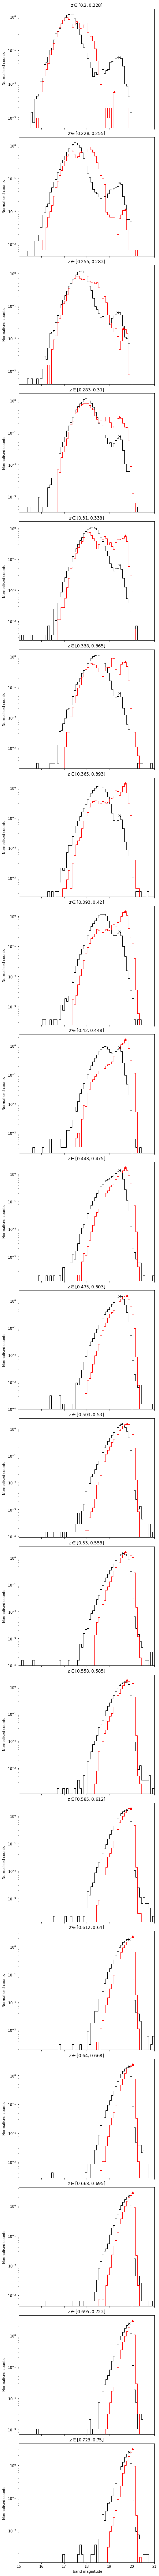

In [5]:
# Plot of the galaxy number count distributions for each redshift bin

bin_width = bin_edges[1:] - bin_edges[:-1]
bin_centers = bin_edges[:-1] + (bin_width)/2
xmin, xmax = 15, 21

fig, axs = plt.subplots(len(redshift_range)-1)

for i in range(0, len(redshift_range)-1):
    axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))
    obs_counts, b, p = axs[i].hist(mag_obs[(redshift_range[i] <= z_obs) & (z_obs < redshift_range[i+1])], bin_edges, density = True, label = 'BOSS', histtype = 'step', color = 'k')
    sim_counts, b, p = axs[i].hist(mag_sim[(redshift_range[i] <= z_sim) & (z_sim < redshift_range[i+1])], bin_edges, density = True, label = 'MICE2', histtype = 'step', color = 'r')
    
    # Explicit recalculation and visualisation of how the code determines the galaxy count turn-off.
    peaks_obs, _ = find_peaks(obs_counts, height=0, prominence=(0.005, None))
    peaks_sim, _ = find_peaks(sim_counts, height=0, prominence=(0.005, None))
    
    axs[i].plot(bin_centers[peaks_obs][-1], obs_counts[peaks_obs][-1], "x", color = 'k')
    axs[i].plot(bin_centers[peaks_sim][-1], sim_counts[peaks_sim][-1], "^", color = 'r')
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_ylabel('Normalised counts')
    axs[i].set_yscale('log')
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)

plt.xlabel('i-band magnitude')
plt.gcf().set_size_inches(6, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('count_histogram_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()

In [6]:
# Binning and counting of simulated data

counts_sim, norm_counts_sim, redshift_range_u =  get_magnitude_counts(mag_sim, z_sim, 
                                                                      bin_edges, redshift_range, 
                                                                      magnified = True,
                                                                      mag_limited = mag_limited, mag_limit = mag_limit)

In [7]:
# Calibration of the alpha value determined from observables with the simulations

#Numpy warnings can be ignored, all infinities and nans are discarded in the code
alpha_nc_list_sim, turn_off_list_sim, turn_off_unc_list_sim = get_alpha_nc(counts_sim, norm_counts_sim, bin_edges, redshift_range)

/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:622: RuntimeWarning: divide by zero encountered in log10
  grad     = np.gradient(np.log10(counts_i), bin_centers)
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1089: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1096: RuntimeWarning: invalid value encountered in

In [8]:
max_overlap_indx_list, max_overlap_range_list, max_overlap_alpha_list, max_overlap_alpha_unc_list, overlap_list, ranges_list, alpha_list, alpha_unc_list = get_calibration(alpha_est_list, alpha_est_unc_list,
                                                                                                                                                                           alpha_nc_list_sim,
                                                                                                                                                                           turn_off_list_sim, turn_off_unc_list_sim,
                                                                                                                                                                           counts_sim,
                                                                                                                                                                           bin_edges,
                                                                                                                                                                           redshift_range)

/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:699: RuntimeWarning: invalid value encountered in true_divide
  alpha_unc = np.sqrt(np.divide(np.sum(np.multiply(weight, (near_turnoff_i - alpha)**2)), (n_weights - 1)*np.sum(weight)/n_weights))/np.sqrt(len(near_turnoff_i))
/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:699: RuntimeWarning: divide by zero encountered in true_divide
  alpha_unc = np.sqrt(np.divide(np.sum(np.multiply(weight, (near_turnoff_i - alpha)**2)), (n_weights - 1)*np.sum(weight)/n_weights))/np.sqrt(len(near_turnoff_i))
/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:734: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  overlap_l

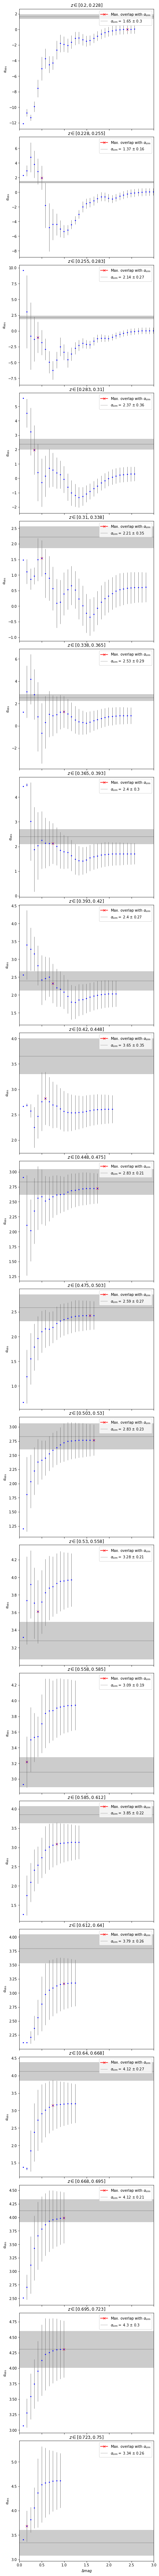

In [9]:
# Plot of the alpha values determined from mock observations when considering different magnitude ranges near the turn-off.

plt.close('all')
xmin, xmax = 0, 3

fig, axs = plt.subplots(len(redshift_range)-1)

for i in range(0, len(redshift_range)-1):
    axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))
    axs[i].plot(ranges_list[i][~np.isnan(overlap_list[i])][max_overlap_indx_list[i]], alpha_list[i][~np.isnan(overlap_list[i])][max_overlap_indx_list[i]], ms = 6.0, marker = 'x', c = 'r', label = r'Max. overlap with $\alpha_{\rm{sim}}$')
    axs[i].errorbar(ranges_list[i], alpha_list[i], yerr = alpha_unc_list[i], fmt = 'o', ecolor='grey', c = 'blue', ms = 2.0, lw = 1.0)
    axs[i].hlines(alpha_est_list[i], xmin, xmax, color = 'k', linewidth = 0.3, label = r'$\alpha_{{\rm{{sim}}}} =$ {a} $\pm$ {b}'.format(a = round(alpha_est_list[i], 2), b = round(alpha_est_unc_list[i], 2)))

    upper = np.repeat(alpha_est_list[i] + alpha_est_unc_list[i], 100)
    lower = np.repeat(alpha_est_list[i] - alpha_est_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='grey', alpha = 0.4)
    
    axs[i].legend()
    axs[i].set_ylabel(r'$\alpha_{\rm{obs}}$')
    axs[i].set_xlim([xmin, xmax])
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)

plt.xlabel(r'$\Delta mag$')
plt.gcf().set_size_inches(6, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('alpha_varying_range_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()

In [11]:
#------------------------------------
# ANALYSIS OF OBSERVATIONS
#------------------------------------

# Determination of alpha values from real observations based on the previous calibration from simulations

counts_obs, norm_counts_obs, redshift_range_u =  get_magnitude_counts(mag_obs, z_obs,
                                                    bin_edges, 
                                                    redshift_range, 
                                                    magnified = True, 
                                                    mag_limited = mag_limited, mag_limit = mag_limit)

In [12]:
alpha_nc_list_obs, turn_off_list_obs, turn_off_unc_list_obs = get_alpha_nc(counts_obs, norm_counts_obs, bin_edges, redshift_range)

/mnt/d/OneDrive - University College London/PhD/BOSS Data/magnification_module_revised.py:622: RuntimeWarning: divide by zero encountered in log10
  grad     = np.gradient(np.log10(counts_i), bin_centers)
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1089: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/maximilian/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:1096: RuntimeWarning: invalid value encountered in

In [13]:
alpha_obs_list, alpha_obs_unc_list = get_alpha_obs(alpha_nc_list_obs, 
                                                   turn_off_list_obs, turn_off_unc_list_obs,
                                                   counts_obs, 
                                                   overlap_list,
                                                   ranges_list, 
                                                   max_overlap_indx_list, 
                                                   bin_edges, 
                                                   redshift_range)

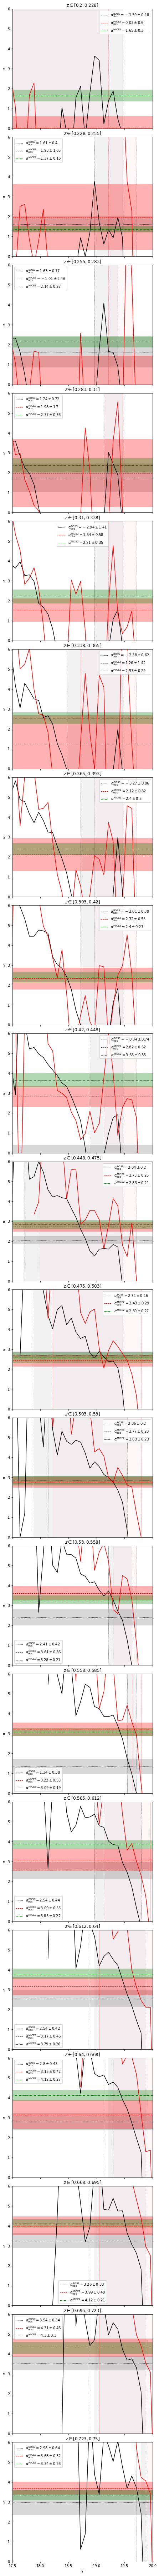

In [14]:
bin_width = bin_edges[1:] - bin_edges[:-1]
bin_centers = bin_edges[:-1] + (bin_width)/2
plt.close('all')
xmin, xmax = 17.5, 20

fig, axs = plt.subplots(len(redshift_range)-1)

for i in range(0, len(redshift_range)-1):
    axs[i].title.set_text(r'$z \in [{0}, {1}]$'.format(round(redshift_range[i], 3), round(redshift_range[i+1], 3)))

    axs[i].plot(bin_centers, alpha_nc_list_obs[i], color = 'k')
    axs[i].plot(bin_centers, alpha_nc_list_sim[i], color = 'r')
    axs[i].plot(bin_centers, np.repeat(alpha_obs_list[i], len(bin_centers)), label = r'$\alpha_{{\rm{{obs}}}}^{{\rm{{BOSS}}}} = {a} \pm {b}$'.format(a = round(alpha_obs_list[i], 2), b = round(alpha_obs_unc_list[i], 2)), color = 'k', ls = ':', lw = 1)
    axs[i].plot(bin_centers, np.repeat(max_overlap_alpha_list[i], len(bin_centers)), label = r'$\alpha_{{\rm{{obs}}}}^{{\rm{{MICE2}}}} = {a} \pm {b}$'.format(a = round(max_overlap_alpha_list[i], 2), b = round(max_overlap_alpha_unc_list[i], 2)), color = 'r', ls = '--', lw = 1)

    axs[i].vlines(turn_off_list_obs[i] - max_overlap_range_list[i], -15, 15, linewidth = 0.6, color = 'k', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_obs[i], -15, 15, linewidth = 0.6, color = 'k', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_sim[i] - max_overlap_range_list[i], -15, 15, linewidth = 0.6, color = 'r', linestyles = 'dotted')
    axs[i].vlines(turn_off_list_sim[i], -15, 15, linewidth = 0.6, color = 'r', linestyles = 'dotted')

    axs[i].fill_between(bin_centers, -2, 15, where= (bin_centers >= turn_off_list_obs[i] - max_overlap_range_list[i]) & (bin_centers <= turn_off_list_obs[i]), facecolor='grey', alpha=0.1)
    axs[i].fill_between(bin_centers, -2, 15, where= (bin_centers >= turn_off_list_sim[i] - max_overlap_range_list[i]) & (bin_centers <= turn_off_list_sim[i]), facecolor='pink', alpha=0.1)

    upper = np.repeat(alpha_obs_list[i] + alpha_obs_unc_list[i], 100)
    lower = np.repeat(alpha_obs_list[i] - alpha_obs_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='grey', alpha = 0.3)

    upper = np.repeat(max_overlap_alpha_list[i] + max_overlap_alpha_unc_list[i], 100)
    lower = np.repeat(max_overlap_alpha_list[i] - max_overlap_alpha_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='red', alpha = 0.3)

    axs[i].plot(bin_centers, np.repeat(alpha_est_list[i], len(bin_centers)), label = r'$\alpha^{{\rm{{MICE2}}}} = {a} \pm {b}$'.format(a = round(alpha_est_list[i], 2), b = round(alpha_est_unc_list[i], 2)), color = 'green', ls = '-.', lw = 1)
    upper = np.repeat(alpha_est_list[i] + alpha_est_unc_list[i], 100)
    lower = np.repeat(alpha_est_list[i] - alpha_est_unc_list[i], 100)
    axs[i].fill_between(np.linspace(xmin, xmax, 100), lower, upper, facecolor='green', alpha = 0.3)

    axs[i].set_ylim([0, 6])
    axs[i].set_xlim([xmin, xmax])
    axs[i].set_ylabel(r'$\alpha$')
    axs[i].legend()
    if i < len(redshift_range)-2:
        plt.setp(axs[i].get_xticklabels(), visible=False)

plt.xlabel(r'$i$')
plt.gcf().set_size_inches(6, 5*(len(redshift_range)-1), forward=True)
plt.tight_layout(pad=0)
plt.savefig('alpha_histogram_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()


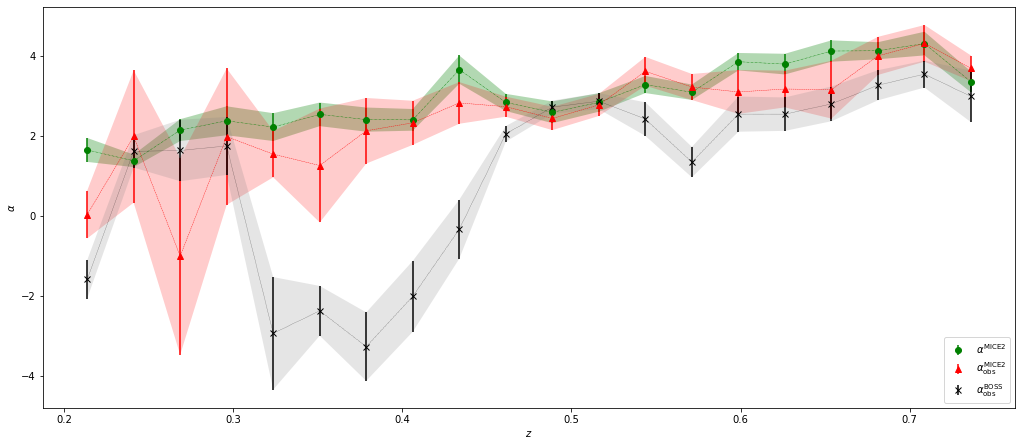

In [15]:
redshift_width = redshift_range[1:] - redshift_range[:-1]
redshift_centers = redshift_range[:-1] + (redshift_width)/2

plt.close('all')

plt.errorbar(redshift_centers, alpha_est_list, yerr = alpha_est_unc_list, label = r'$\alpha^{\rm{MICE2}}$', color =  'g', fmt = 'o')
upper = alpha_est_list + alpha_est_unc_list
lower = alpha_est_list - alpha_est_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='green', alpha = 0.3)

plt.plot(redshift_centers, alpha_est_list, color = 'g', lw = 0.4, ls = '-.')

plt.errorbar(redshift_centers, max_overlap_alpha_list, yerr = max_overlap_alpha_unc_list, marker="^", label = r'$\alpha^{\rm{MICE2}}_{\rm{obs}}$', color = 'r', fmt = 'o')

upper = max_overlap_alpha_list + max_overlap_alpha_unc_list
lower = max_overlap_alpha_list - max_overlap_alpha_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='red', alpha = 0.2)

plt.plot(redshift_centers, max_overlap_alpha_list, color = 'r', lw = 0.4, ls = '--')
plt.errorbar(redshift_centers, alpha_obs_list, yerr = alpha_obs_unc_list, marker='x', label = r'$\alpha^{\rm{BOSS}}_{\rm{obs}}$', color = 'k', fmt = 'o')

upper = alpha_obs_list + alpha_obs_unc_list
lower = alpha_obs_list - alpha_obs_unc_list
plt.fill_between(redshift_centers, lower, upper, facecolor='grey', alpha = 0.2)

plt.plot(redshift_centers, alpha_obs_list, color = 'k', lw = 0.4, ls = ':')
#plt.xticks(redshift_range)

plt.xlabel(r'$z$')
plt.ylabel(r'$\alpha$')
plt.gcf().set_size_inches(14, 6, forward=True)
plt.tight_layout(pad=0)
plt.legend(loc =  'lower right')
plt.savefig('alpha_range_from_{0}-band_bins={1}_{2}.pdf'.format('i', bins, tag))
plt.show()